<a href="https://colab.research.google.com/github/MauryaTushar213/MauryaTushar213/blob/main/spotify%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import Adam
# Ignore warnings & set plot style
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")


In [48]:
 import pandas as pd
 import numpy as np
 import seaborn as sns
 import warnings
 from matplotlib import pyplot as plt
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler, LabelEncoder
 from sklearn.linear_model import LogisticRegression
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.svm import SVC
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# from tensorflow.keras.models import Sequential
 #from tensorflow.keras.layers import Dense
 #from tensorflow.keras.optimizers import Adam
# Ignore warnings & set plot style
 sns.set_style("whitegrid")
 warnings.filterwarnings("ignore")

#import pandas as pd
# Load the dataset (replace 'your_dataset.csv' with the actual file name)
#data = pd.read_csv('your_dataset.csv')

# Display basic information about the dataset
#print(data.info())
#print(data.describe())
#print(data.head())


In [49]:
# 1. Setup (Ignore warnings & set plot style)
%matplotlib inline
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")



In [50]:
# 2. Load dataset
df = pd.read_csv('/SpotifyFeatures.csv')



In [51]:
# 3. Convert categorical columns to numeric
df['key'] = df['key'].astype('category').cat.codes
df['genre'] = df['genre'].astype('category').cat.codes
df['mode'] = df['mode'].map({'Major': 1, 'Minor': 0})
df['time_signature'] = df['time_signature'].astype('category').cat.codes



In [52]:
# 4. Convert 'popularity' into binary (0 = unpopular, 1 = popular)
df['popularity'] = (df['popularity'] > 70).astype(int)

# 5. Remove unnecessary columns
df.drop(columns=['track_id', 'track_name', 'artist_name'], inplace=True)

# 6. Show first 5 rows
df.head()


,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,6,0,0.611,0.389,99373,0.910,0.000,4,0.3460,-1.828,1,0.0525,166.969,3,0.814
1,6,0,0.246,0.590,137373,0.737,0.000,9,0.1510,-5.559,0,0.0868,174.003,3,0.816
2,6,0,0.952,0.663,170267,0.131,0.000,3,0.1030,-13.879,0,0.0362,99.488,4,0.368
3,6,0,0.703,0.240,152427,0.326,0.000,4,0.0985,-12.178,1,0.0395,171.758,3,0.227
4,6,0,0.950,0.331,82625,0.225,0.123,8,0.2020,-21.150,1,0.0456,140.576,3,0.390


In [53]:
df.corr()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,1.000000,0.086494,-0.027497,0.264894,0.063787,0.000986,0.175382,-0.003435,0.016133,0.005143,-0.057467,0.051122,0.001393,0.048615,0.006033
popularity,0.086494,1.000000,-0.009066,0.087656,-0.034234,-0.002562,-0.066567,0.004505,-0.032722,0.051967,-0.026959,0.006286,-0.025234,0.015635,0.045263
acousticness,-0.027497,-0.009066,1.000000,-0.056325,-0.033145,-0.673448,0.066575,-0.017916,-0.078229,-0.559285,0.047146,-0.028299,-0.147198,-0.130145,-0.115119
danceability,0.264894,0.087656,-0.056325,1.000000,-0.062923,-0.041637,-0.055097,-0.010173,-0.082295,0.025614,-0.047221,0.098970,-0.187041,0.144896,0.388354
duration_ms,0.063787,-0.034234,-0.033145,-0.062923,1.000000,-0.012366,0.154341,0.002587,0.009643,-0.075721,-0.017817,-0.003677,-0.004236,-0.008688,-0.131123
energy,0.000986,-0.002562,-0.673448,-0.041637,-0.012366,1.000000,-0.072378,0.006077,0.172075,0.751314,-0.047299,0.102779,0.202021,0.150204,0.236698
instrumentalness,0.175382,-0.066567,0.066575,-0.055097,0.154341,-0.072378,1.000000,-0.007882,-0.006376,-0.285365,-0.063531,-0.077550,0.001849,-0.034485,-0.168559
key,-0.003435,0.004505,-0.017916,-0.010173,0.002587,0.006077,-0.007882,1.000000,0.000792,0.008928,0.058848,-0.008913,0.008211,0.002357,-0.000296
liveness,0.016133,-0.032722,-0.078229,-0.082295,0.009643,0.172075,-0.006376,0.000792,1.000000,0.096917,-0.002791,0.111908,0.029791,0.002135,0.014107
loudness,0.005143,0.051967,-0.559285,0.025614,-0.075721,0.751314,-0.285365,0.008928,0.096917,1.000000,-0.027642,0.059291,0.146582,0.124060,0.140592


In [54]:
print(df.isnull().sum())

genre               0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               1
time_signature      0
valence             1
dtype: int64


In [55]:
print(list(df.columns))

['genre', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']


In [56]:
from sklearn.model_selection import train_test_split

# Assuming you have a dataframe named 'dataframe'
features = ["danceability", "duration_ms", "energy", "key",
            "mode", "speechiness", "tempo", "valence"]
dataframe=df
# Split the data into training and testing sets
training = dataframe.sample(frac=0.9, random_state=420)
X_train = training[features]
y_train = training['popularity']

# Create the test set features (X_test) and labels (y_test)
X_test = dataframe.drop(training.index)[features]
y_test = dataframe.drop(training.index)['popularity']

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=420)

print(f'Training set shape: {X_train.shape}, Validation set shape: {X_valid.shape}, Test set shape: {X_test.shape}')

Training set shape: (21228, 8), Validation set shape: (5308, 8), Test set shape: (2949, 8)


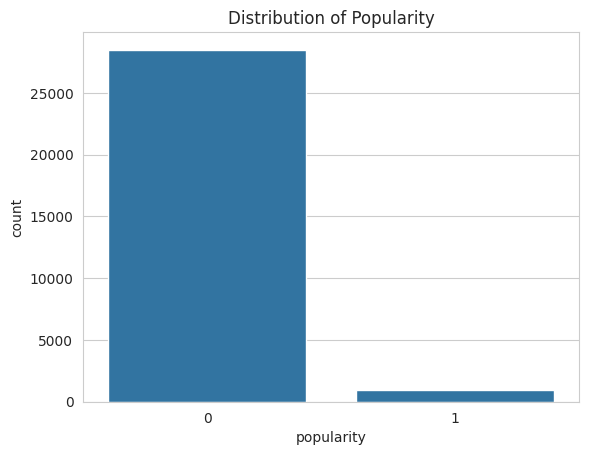

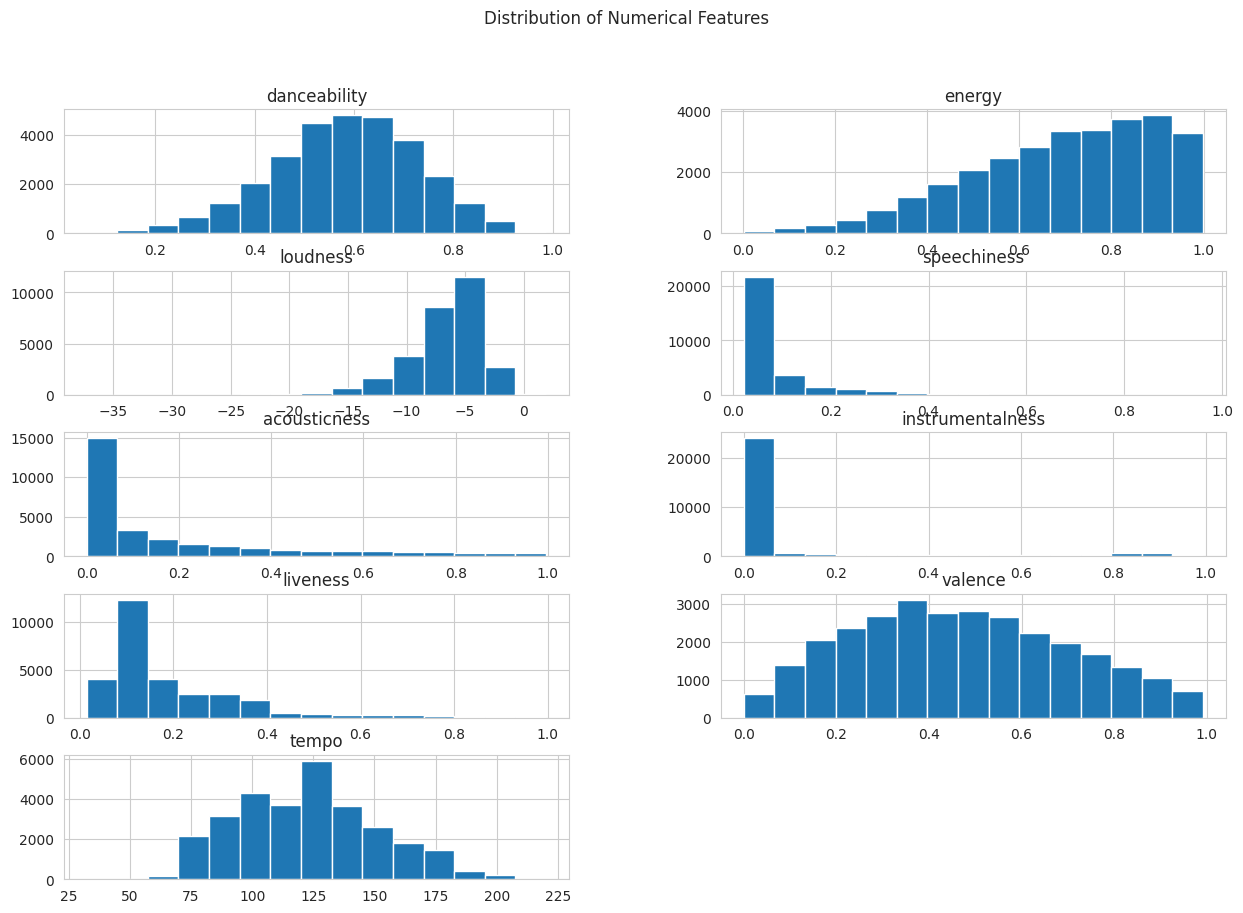

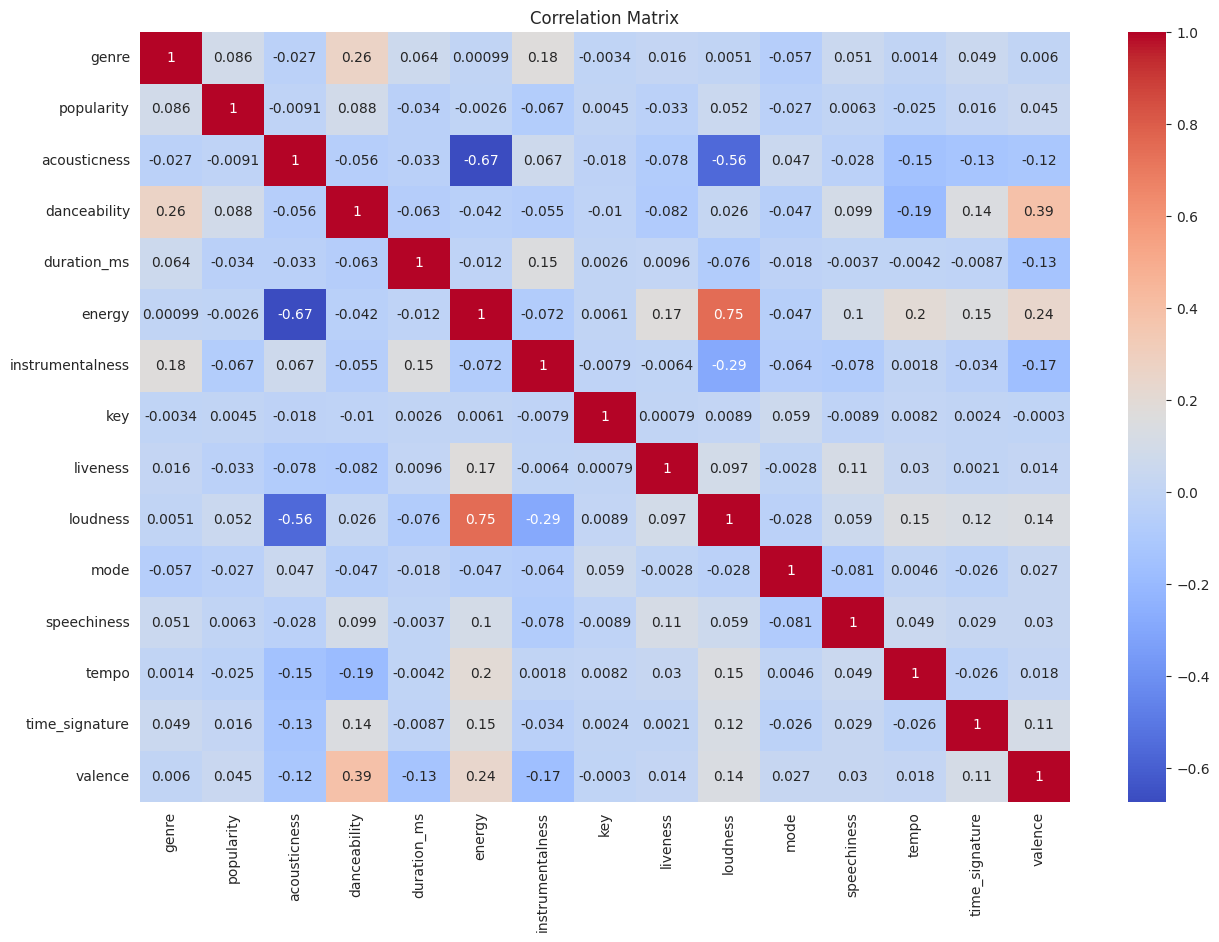

In [57]:
# Visualize the target variable distribution (e.g., popularity)
sns.countplot(x='popularity', data=df)
plt.title('Distribution of Popularity')
plt.show()

# Visualize the distribution of other numerical features
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(5, 2))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [58]:
# Select relevant features and target variable
X = df.drop(columns=['popularity'])  # Assuming 'popularity' is the target
y = df['popularity']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in X and apply LabelEncoder
for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])

# Fit and transform the target variable y
y_encoded = label_encoder.fit_transform(y)

# Split the encoded target variable and the features into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train
X_test

array([[-1.25381348,  0.40839758, -2.27286621, ..., -1.68362942,
         0.18293995, -1.38639826],
       [ 0.63817622, -0.13480909,  0.73909643, ..., -0.53205888,
         0.18293995, -0.66245678],
       [-1.25381348,  0.79836501, -0.12146432, ..., -0.68593493,
         0.18293995, -1.28465513],
       ...,
       [ 0.63817622,  1.10801395, -0.94787584, ..., -1.26199795,
         0.18293995, -1.15943282],
       [ 0.63817622,  0.59651195, -0.46295669, ...,  1.37704101,
         0.18293995, -0.19678631],
       [ 1.26883946, -0.22569581,  0.62298903, ..., -0.83462622,
         0.18293995, -0.24374467]])

In [59]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.9694760047481771
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5717
           1       0.00      0.00      0.00       180

    accuracy                           0.97      5897
   macro avg       0.48      0.50      0.49      5897
weighted avg       0.94      0.97      0.95      5897



In [60]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.9326776326945905
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      5717
           1       0.08      0.12      0.10       180

    accuracy                           0.93      5897
   macro avg       0.53      0.54      0.53      5897
weighted avg       0.94      0.93      0.94      5897



In [61]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.9694760047481771
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5717
           1       0.00      0.00      0.00       180

    accuracy                           0.97      5897
   macro avg       0.48      0.50      0.49      5897
weighted avg       0.94      0.97      0.95      5897



In [62]:
# Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, svm_pred))
print("Support Vector Machine Classification Report:\n", classification_report(y_test, svm_pred))


Support Vector Machine Accuracy: 0.9694760047481771
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5717
           1       0.00      0.00      0.00       180

    accuracy                           0.97      5897
   macro avg       0.48      0.50      0.49      5897
weighted avg       0.94      0.97      0.95      5897



In [63]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_pred))
print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, knn_pred))


K-Nearest Neighbors Accuracy: 0.968288960488384
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5717
           1       0.32      0.03      0.06       180

    accuracy                           0.97      5897
   macro avg       0.64      0.52      0.52      5897
weighted avg       0.95      0.97      0.96      5897



In [64]:
# Define the neural network model
model = Sequential([
    Dense(10, activation='relu', input_dim=X_train.shape[1]),
    Dense(2, activation='tanh'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate and predict
accuracy = model.evaluate(X_test, y_test)[1]
predictions = (model.predict(X_test) > 0.5).astype(int)

print(f'Neural Network Accuracy: {accuracy:.2f}')
print("Neural Network Predictions:", predictions[:5].flatten())  # Show first 5 predictions

# Compute AUC
cnn_auc = roc_auc_score(y_test, predictions)
print(f'AUC: {cnn_auc:.2f}')


Epoch 1/5
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9219 - loss: 0.2656 - val_accuracy: 0.9684 - val_loss: 0.1286
Epoch 2/5
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9662 - loss: 0.1316 - val_accuracy: 0.9684 - val_loss: 0.1235
Epoch 3/5
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9650 - loss: 0.1307 - val_accuracy: 0.9684 - val_loss: 0.1212
Epoch 4/5
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9652 - loss: 0.1274 - val_accuracy: 0.9684 - val_loss: 0.1205
Epoch 5/5
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9650 - loss: 0.1236 - val_accuracy: 0.9684 - val_loss: 0.1180
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9712 - loss: 0.1105
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network Accuracy: 0.97
Neural Network Predictions: [0 0 0 0 0]
AUC: 0.50
